In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import littleglyphs as lilg
import littleglyphs.plotting as lilgplt
import littleglyphs.classification as lilgcls
import littleglyphs.examples as lilgex
import littleglyphs.generation as lilggen

import importlib
importlib.reload(lilg)
importlib.reload(lilgplt)
importlib.reload(lilgcls)
importlib.reload(lilgex)
importlib.reload(lilggen)


<module 'littleglyphs.generation' from '/home/incide/projects/littleglyphs/littleglyphs/generation.py'>

In [10]:
import copy
import time

import numpy as np
import scipy
import skimage
import sklearn 
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

random_seed = 456

np.random.seed(random_seed)

In [11]:
N_glyphs_in_alphabet = 10

N_glyph_permutations = 5
permutation_strength = 0.08
imgsize = 28

N_glyph_raster_distortions = 5
rotat_distort_max = np.pi / 12
shear_distort_max = np.pi / 12
scale_distort_max = 0.25

blur_factor = 1

alphabet_generator = lilgex.basic_random_glyph_generator()

glyph_categories = list(range(0,N_glyphs_in_alphabet))
glyph_alphabet = alphabet_generator.generate_random_glyph_alphabet(glyph_categories)
glyph_permuted_alphabet = glyph_alphabet.permuted(permutation_strength, N_glyph_permutations)

glyph_rasters = glyph_permuted_alphabet.render(
    (imgsize,imgsize), 
    blur_factor=blur_factor,randomize_blur=True,random_blur_extent=2
)
distorter = lilg.SequentialDistorter(
    [lilg.DistortionRandomAffine(
        rotat_distort_max = rotat_distort_max, 
        shear_distort_max = shear_distort_max,
        scale_distort_max = scale_distort_max
    )])
glyph_rasters = glyph_rasters.distorted(distorter, N_glyph_raster_distortions)


Ground truth glyphs:


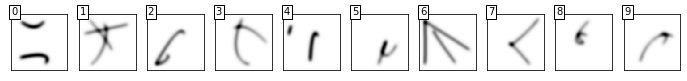

In [12]:
print('Ground truth glyphs:')
fig, axs = lilgplt.visualize_glyph_list(
    glyph_alphabet,
    N_glyphs_to_show = N_glyphs_in_alphabet, 
    imgsize=128, 
    blur_factor=0.5*16,
    figsize=(12,6)
)
plt.show()